In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import os
import mmcv
import importlib
import torch
import torchvision.transforms as transforms
from mmcv import Config
from mmcls.datasets.pipelines import Compose
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from PIL import Image
import heapq
from mmseg.apis import inference_segmentor, init_segmentor
from mmseg.core.evaluation import get_palette
from pytorch_grad_cam.utils.image import show_cam_on_image
import cv2

import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    

from scripts import generate_statistics_single
from scripts import visualization_seg_masks
from scripts import generate_statistics
from scripts import generate_cams
from scripts import utils
from scripts import new_gen_seg
from scripts.utils.pipeline import get_pipeline_torchvision

In [2]:
configSeg = '../segmentation/ocrnet_hr48_512x512_carparts_noflip/ocrnet_hr48_512x512_carparts_noflip.py'
checkpointSeg = '../segmentation/ocrnet_hr48_512x512_carparts_noflip/latest.pth'
imgRoot = '../data/CompCars_sv_original_split/train'
configCAM = '../CAMModels/resnet/compCars_Original/resnet50_b128x2_compcars-original-split.py'
checkpointCAM = '../CAMModels/resnet/compCars_Original/latest.pth'
annfile = '../annfile.txt'
imgName='Acura_Acura_ILX_2a6cce617fc27d.jpg'
imgPath=os.path.join(imgRoot, imgName)

paletteName='Comp_Original_Ocrnet_Carparts_Noflip'

Calculating results for batch 0
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1/1, 0.3 task/s, elapsed: 4s, ETA:     0sGenerate Results for file: ../data/CompCars_sv_original_split/train\Acura_Acura_ILX_2a6cce617fc27d.jpg
Generate Results for specified files
Automatically choose the last norm layer as target_layer.


CAMs generated:1/1: 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]


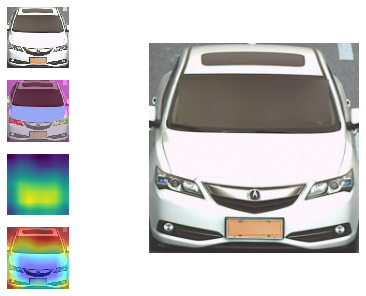

In [4]:
generate_statistics_single.plot(imgName='Acura_Acura_ILX_2a6cce617fc27d.jpg', imgRoot=imgRoot, camConfig=configCAM,
                                camCheckpoint=checkpointCAM, segConfig=configSeg, segCheckpoint=checkpointSeg)

Calculating segmentation results for batch 0
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1/1, 0.3 task/s, elapsed: 4s, ETA:     0sGenerate Results for file: ../data/CompCars_sv_original_split/train\Acura_Acura_ILX_2a6cce617fc27d.jpg
Generate Results for specified files
Automatically choose the last norm layer as target_layer.
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1/1, 3.9 task/s, elapsed: 0s, ETA:     0s

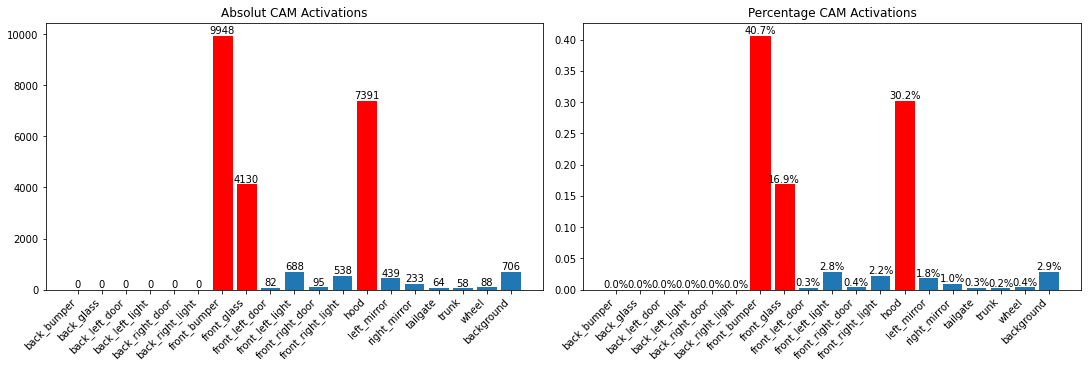

In [14]:
generate_statistics_single.generate_bar_cam_intersection(imgName='Acura_Acura_ILX_2a6cce617fc27d.jpg',
                                                         imgRoot=imgRoot, camConfig=configCAM, 
                                                         camCheckpoint=checkpointCAM, segConfig=configSeg,
                                                         segCheckpoint=checkpointSeg)

In [ ]:
generate_statistics_single.generate_bar_cam_intersection_prop_area(imgName='Acura_Acura_ILX_2a6cce617fc27d.jpg',
                                                         imgRoot=imgRoot, camConfig=configCAM, 
                                                         camCheckpoint=checkpointCAM, segConfig=configSeg,
                                                         segCheckpoint=checkpointSeg)

Calculating segmentation results for batch 0
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1/1, 0.3 task/s, elapsed: 4s, ETA:     0sGenerate Results for file: ../data/CompCars_sv_original_split/train\Acura_Acura_ILX_2a6cce617fc27d.jpg
Generate Results for specified files
Automatically choose the last norm layer as target_layer.
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1/1, 3.6 task/s, elapsed: 0s, ETA:     0s

In [ ]:
generate_statistics_single.generate_bar_cam_intersection_prop_area(imgName='Acura_Acura_ILX_2a6cce617fc27d.jpg',
                                                         imgRoot=imgRoot, camConfig=configCAM, 
                                                         camCheckpoint=checkpointCAM, segConfig=configSeg,
                                                         segCheckpoint=checkpointSeg)